In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer #imputation missing data 
df=pd.read_csv("/content/Wuzzuf_Jobs.csv")
d1=pd.DataFrame(df)
d1.head(5)


,Title,Company,Location,Type,Level,YearsExp,Country,Skills
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ..."
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin..."
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ..."
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an..."
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain"


In [2]:

df.sort_values("Title", inplace = True)
df.drop_duplicates(keep = "first", inplace = True)
X = df.iloc[:, :-1].values
y = df.iloc[:, 7].values
imputer = SimpleImputer(missing_values = "", strategy = 'most_frequent')
imputer = imputer.fit(X[:, 0:7])
X[:, 0:7] = imputer.transform(X[:, 0:7])


In [3]:
df.describe()


,Title,Company,Location,Type,Level,YearsExp,Country,Skills
count,4377,4377,4377,4377,4377,4377,4377,4377
unique,2965,1534,162,6,9,101,42,4227
top,Accountant,Confidential,Cairo,Full Time,Experienced,1-3 Yrs of Exp,Cairo,"Corporate Sales, Real Estate, Advertising, Mar..."
freq,57,590,563,4166,2196,414,2227,12


In [4]:
#cleaning dataset
df.sort_values("Title", inplace = True)
df.drop_duplicates(keep = "first", inplace = True)
X = df.iloc[:, :-1].values
y = df.iloc[:, 7].values

imputer = SimpleImputer(missing_values = "", strategy = 'most_frequent')
imputer = imputer.fit(X[:, 0:7])
X[:, 0:7] = imputer.transform(X[:, 0:7])


In [5]:
df['Company'].value_counts().head()

Confidential    590
Mishkat Nour     39
Expand Cart      35
EGIC             34
Aqarmap.com      25
Name: Company, dtype: int64

Confidential    590
Mishkat Nour     39
Expand Cart      35
EGIC             34
Aqarmap.com      25
Name: Company, dtype: int64


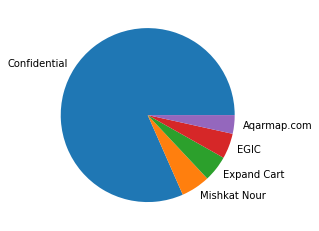

In [6]:
#compny
numOfjops=df['Company'].value_counts().head()
print(numOfjops)
labels=list(numOfjops.keys())
plt.pie(numOfjops,labels = labels)
plt.show()


Accountant                      57
Sales Representative            47
Graphic Designer                43
Digital Marketing Specialist    26
Sales Manager                   25
Name: Title, dtype: int64


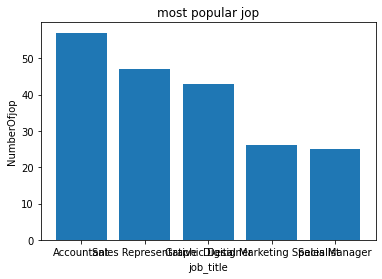

In [7]:
#jops
jobs=df['Title'].value_counts().head()
print(jobs)
plt.xlabel("job_title")
plt.ylabel("NumberOfjop")
plt.title("most popular jop")
jobLabels=jobs.keys()
plt.bar(jobLabels,jobs)
plt.show()


 Cairo             563
 Maadi             524
 New Cairo         520
 Nasr City         424
 6th of October    282
Name: Location, dtype: int64


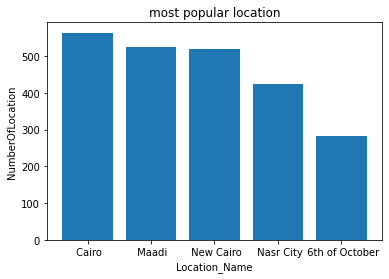

In [8]:
#areas
areas=df['Location'].value_counts().head()
print(areas)
plt.xlabel("Location_Name")
plt.ylabel("NumberOfLocation")
plt.title("most popular location")
locLable=list(areas.keys())
plt.bar(locLable,areas)
plt.show()



Corporate Sales, Real Estate, Advertising, Marketing, Sales Skills, Insurance, Sales Target, Outdoor Sales, Telesales, Property       12
Logistics, SAP, Inventory, Store Keeping, Logistics/Supply Chain                                                                      11
Sales Skills, Sales Target, Customer Services, Customer Care, Retail, Collection, Distribution, Selling Skills, Negotiation Skills    10
Medical, Training, Family Palnning, Contraceptives, MoHP, Medical/Healthcare, Training/Instructor                                      9
Finance, Sales Accounting, Commerce, Budget, Reporting, Accounting/Finance                                                             9
Name: Skills, dtype: int64


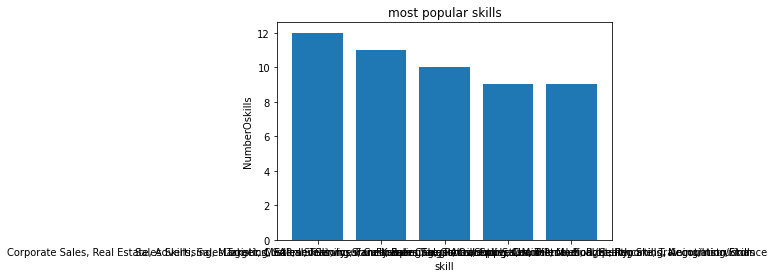

In [9]:

skills=df['Skills'].value_counts().head()
print(skills)
skillsLabel=list(skills.keys())
plt.xlabel("skill")
plt.ylabel("NumberOskills")
plt.title("most popular skills")
plt.bar(skillsLabel,skills)
plt.show()

In [10]:
df["Skills"] = df["Skills"].str.split(",")
df.head()

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
3410,.NET Angular Software Developer,Xceed,Maadi,Full Time,Experienced,5+ Yrs of Exp,Cairo,"[Software Development, Computer Science, Sof..."
2859,.NET Back-End Web Developer,Confidential,Cairo,Full Time,Experienced,2-5 Yrs of Exp,Egypt,"[Computer Science, Software Development, jav..."
1717,.NET Developer,Beta Electronics,Dokki,Full Time,Experienced,2-5 Yrs of Exp,Giza,"[C#, Engineering, Computer Science, Program..."
3074,.NET Developer,Dynamicslink,Nasr City,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"[Microsoft Dynamics, ERP, Computer Science, ..."
2862,.NET Developer (Desktop Application),Confidential,Manial,Full Time,Experienced,2-5 Yrs of Exp,Cairo,"[Information Technology (IT), .NET, C#, Sof..."


In [11]:
df_skills = pd.DataFrame(df['Skills'].tolist()).fillna('').add_prefix('Skill_')

In [12]:
df = pd.concat([df, df_skills], axis=1)

 Sales Target                   190
 Sales Skills                   183
 Computer Science               133
 Customer Service               114
 Information Technology (IT)    105
Name: Skill_1, dtype: int64


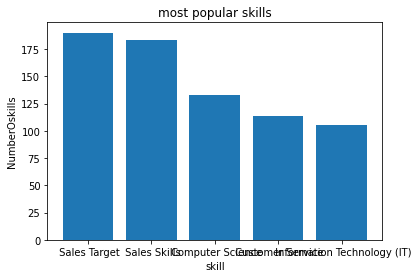

In [13]:
# split the column of skills into multiple column
skills=df['Skill_1'].value_counts().head()
print(skills)
skillsLabel=list(skills.keys())
plt.xlabel("skill")
plt.ylabel("NumberOskills")
plt.title("most popular skills")
plt.bar(skillsLabel,skills)
plt.show()